# Runtime： 1.5s-1.9s

In [26]:
import numpy as np
from scipy import special
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df10 = pd.read_csv('output(top=10)/summary.tsv', sep='\t')  
df50 = pd.read_csv('output(top=50)/summary.tsv', sep='\t')
df100 = pd.read_csv('output(top=100)/summary.tsv', sep='\t')

In [20]:
df10 = df10[df10.accuracy != 0]
df50 = df50[df50.accuracy != 0]
df100 = df100[df100.accuracy != 0]

In [9]:
df_mean = df.groupby('parameters').mean()

In [10]:
df_se = df.groupby('parameters').sem()

In [21]:
df10 = df10.groupby('parameters').agg(['mean','sem'])
df10.columns = df10.columns.map('_'.join)
df10.reset_index()


,parameters,trial_id_mean,trial_id_sem,accuracy_mean,accuracy_sem,correct_pos_predicted_mean,correct_pos_predicted_sem,correct_sites_predicted_mean,correct_sites_predicted_sem,kl_dis_mean,kl_dis_sem
0,"param[1, 7, 10]",7.000000,1.000000,0.100000,0.000000,1.000000,0.000000,2.000000,2.000000,4.394708,0.410468
1,"param[1.5, 6, 10]",5.500000,1.322876,0.150000,0.050000,1.500000,0.500000,7.000000,1.471960,1.859737,0.343080
2,"param[1.5, 7, 10]",4.200000,1.157584,0.300000,0.126491,3.000000,1.264911,3.600000,1.503330,2.976395,1.183192
3,"param[1.5, 7, 20]",4.428571,1.324803,0.364286,0.080707,7.285714,1.614138,12.428571,2.245176,1.131037,0.237607
4,"param[1.5, 7, 5]",4.000000,1.527525,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,5.758108,0.672759
5,"param[1.5, 8, 10]",3.166667,1.194897,0.250000,0.092195,2.500000,0.921954,4.166667,1.447220,2.521889,0.590269
6,"param[2, 7, 10]",4.500000,0.957427,0.790000,0.078102,7.900000,0.781025,9.300000,0.422953,0.133444,0.059987


In [22]:
df50 = df50.groupby('parameters').agg(['mean','sem'])
df50.columns = df50.columns.map('_'.join)
df50.reset_index()

,parameters,trial_id_mean,trial_id_sem,accuracy_mean,accuracy_sem,correct_pos_predicted_mean,correct_pos_predicted_sem,correct_sites_predicted_mean,correct_sites_predicted_sem,kl_dis_mean,kl_dis_sem
0,"param[1, 7, 10]",7.000000,1.000000,0.100000,0.000000,1.000000,0.000000,2.000000,2.000000,4.394708,0.410468
1,"param[1.5, 7, 10]",3.500000,1.190238,0.325000,0.160078,3.250000,1.600781,4.250000,1.750000,3.041157,1.525204
2,"param[1.5, 7, 20]",4.428571,1.324803,0.292857,0.078246,5.857143,1.564922,13.142857,1.352750,1.471176,0.402041
3,"param[1.5, 7, 5]",4.000000,1.527525,0.200000,0.000000,1.000000,0.000000,1.000000,1.000000,4.747524,1.462333
4,"param[1.5, 8, 10]",3.571429,1.087968,0.228571,0.080812,2.285714,0.808122,4.000000,1.234427,2.359576,0.524610
5,"param[2, 7, 10]",4.500000,0.957427,0.780000,0.075719,7.800000,0.757188,9.300000,0.422953,0.137955,0.059034


In [23]:
df100 = df100.groupby('parameters').agg(['mean','sem'])
df100.columns = df100.columns.map('_'.join)
df100.reset_index()

,parameters,trial_id_mean,trial_id_sem,accuracy_mean,accuracy_sem,correct_pos_predicted_mean,correct_pos_predicted_sem,correct_sites_predicted_mean,correct_sites_predicted_sem,kl_dis_mean,kl_dis_sem
0,"param[1, 7, 10]",4.800000,1.157584,0.100000,0.000000,1.000000,0.000000,0.600000,0.400000,4.860196,0.532923
1,"param[1.5, 7, 10]",5.000000,0.577350,0.266667,0.120185,2.666667,1.201850,3.666667,2.666667,3.428547,1.262104
2,"param[1.5, 7, 20]",4.666667,1.358103,0.125000,0.038188,2.500000,0.763763,1.166667,0.654047,4.607944,0.663802
3,"param[1.5, 7, 5]",4.000000,1.527525,0.200000,0.000000,1.000000,0.000000,1.000000,1.000000,4.747524,1.462333
4,"param[1.5, 8, 10]",3.571429,1.087968,0.228571,0.080812,2.285714,0.808122,4.000000,1.234427,2.359576,0.524610
5,"param[2, 7, 10]",6.400000,1.077033,0.180000,0.037417,1.800000,0.374166,3.800000,1.240967,2.293691,0.705692


Text(0.5, 0.98, 'Accuracy(Number of overlapping positions/Number of sequence)')

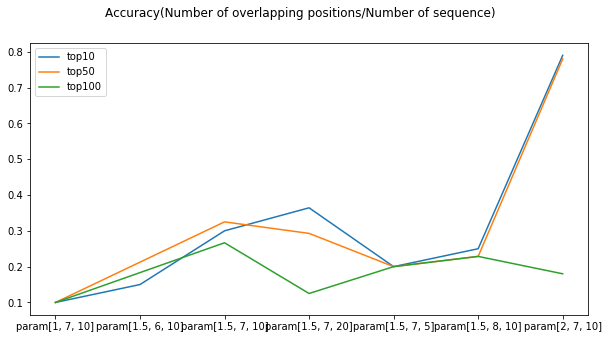

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df10['accuracy_mean'], label='top10')
ax.plot(df50['accuracy_mean'], label='top50')
ax.plot(df100['accuracy_mean'], label='top100')
leg = ax.legend()
fig.suptitle('Accuracy(Number of overlapping positions/Number of sequence)')



Text(0.5, 0.98, 'Number of overlapping positions')

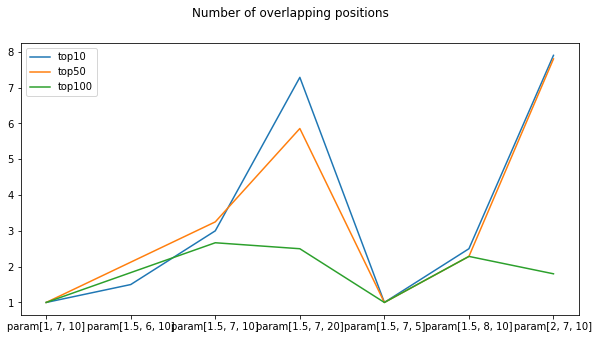

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df10['correct_pos_predicted_mean'], label='top10')
ax.plot(df50['correct_pos_predicted_mean'], label='top50')
ax.plot(df100['correct_pos_predicted_mean'], label='top100')
leg = ax.legend()
fig.suptitle('Number of overlapping positions')

Text(0.5, 0.98, 'Number of overlapping sites')

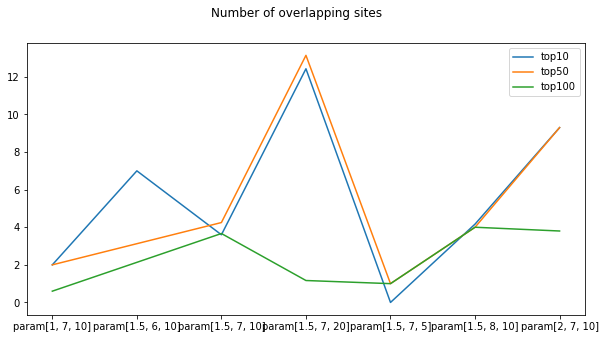

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df10['correct_sites_predicted_mean'], label='top10')
ax.plot(df50['correct_sites_predicted_mean'], label='top50')
ax.plot(df100['correct_sites_predicted_mean'], label='top100')
leg = ax.legend()
fig.suptitle('Number of overlapping sites')

Text(0.5, 0.98, 'Kullback-Leibler (KL) divergence')

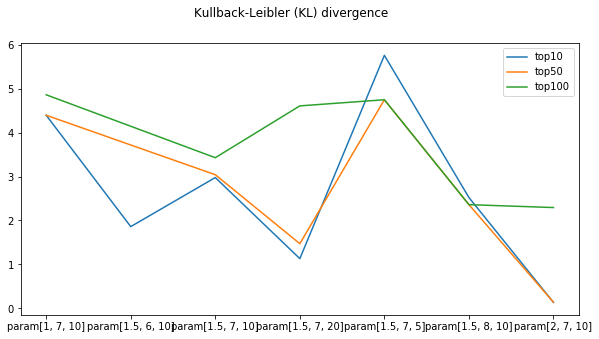

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df10['kl_dis_mean'], label='top10')
ax.plot(df50['kl_dis_mean'], label='top50')
ax.plot(df100['kl_dis_mean'], label='top100')
leg = ax.legend()
fig.suptitle('Kullback-Leibler (KL) divergence')

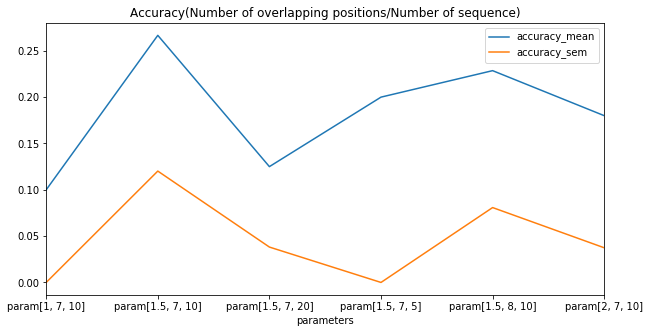

In [58]:
lines = df.plot.line(y=['accuracy_mean','accuracy_sem'],figsize=(10,5),title='Accuracy(Number of overlapping positions/Number of sequence)')

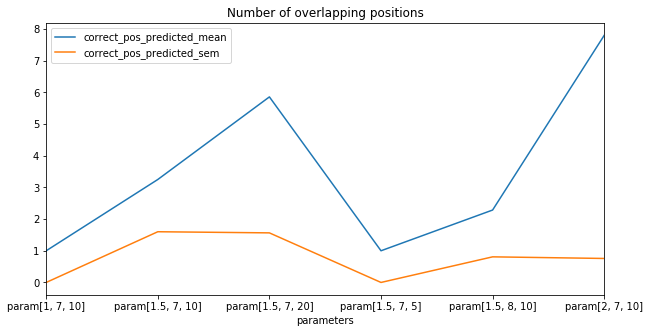

In [14]:
lines = df.plot.line(y=['correct_pos_predicted_mean','correct_pos_predicted_sem'],figsize=(10,5),title='Number of overlapping positions')

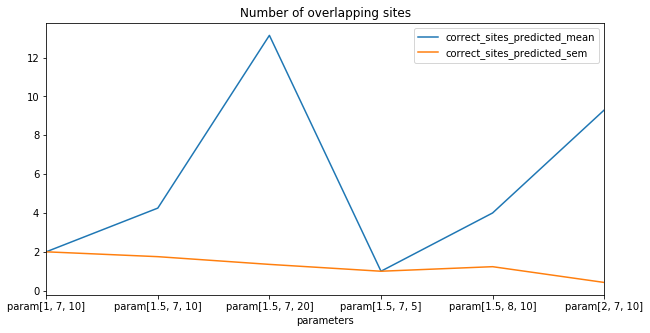

In [15]:
lines = df.plot.line(y=['correct_sites_predicted_mean','correct_sites_predicted_sem'],figsize=(10,5),title='Number of overlapping sites')

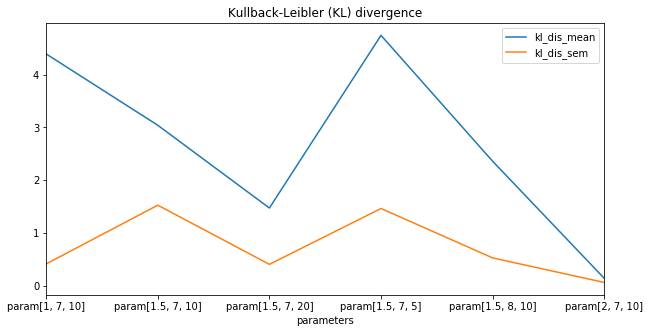

In [16]:
lines = df.plot.line(y=['kl_dis_mean','kl_dis_sem'],figsize=(10,5),title='Kullback-Leibler (KL) divergence')

In [17]:
df_mean

,trial_id,accuracy,correct_pos_predicted,correct_sites_predicted,kl_dis
parameters,,,,,
"param[1, 7, 10]",7.000000,0.100000,1.000000,2.000000,4.394708
"param[1.5, 7, 10]",3.500000,0.325000,3.250000,4.250000,3.041157
"param[1.5, 7, 20]",4.428571,0.292857,5.857143,13.142857,1.471176
"param[1.5, 7, 5]",4.000000,0.200000,1.000000,1.000000,4.747524
"param[1.5, 8, 10]",3.571429,0.228571,2.285714,4.000000,2.359576
"param[2, 7, 10]",4.500000,0.780000,7.800000,9.300000,0.137955


In [18]:
df_se

,trial_id,accuracy,correct_pos_predicted,correct_sites_predicted,kl_dis
parameters,,,,,
"param[1, 7, 10]",1.000000,0.000000,0.000000,2.000000,0.410468
"param[1.5, 7, 10]",1.190238,0.160078,1.600781,1.750000,1.525204
"param[1.5, 7, 20]",1.324803,0.078246,1.564922,1.352750,0.402041
"param[1.5, 7, 5]",1.527525,0.000000,0.000000,1.000000,1.462333
"param[1.5, 8, 10]",1.087968,0.080812,0.808122,1.234427,0.524610
"param[2, 7, 10]",0.957427,0.075719,0.757188,0.422953,0.059034
